

# **Text Mining - Word Clouds**

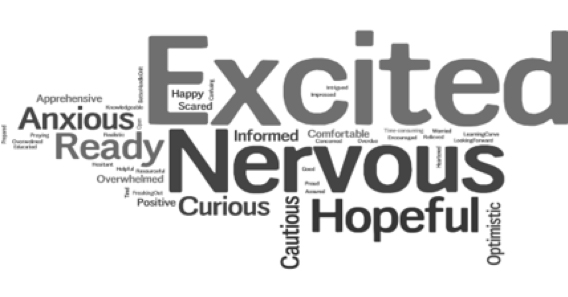

---

## Functions
* `install.packages("XML")`
* `install.packages("tm")`
* `install.packages("wordcloud")`
* `library(XML)`
* `library(tm)`
* `library(wordcloud)`
* `readLines()`
* `URLencode()`
* `htmlTreeParse()`
* `unlist()`
* `VectorSource()`
* `Corpus()`
* `TermDocumentMatrix()`
* `rowSums()`
* `wordcloud()`
* `tm_map()`


<br>

---

## Unstructured Data





*   Previous lessons focused on analysis of structured data
  *   What are some examples of structured data?

* Even when data was unstructured (messy!), we still structured our data using data wrangling techniques

<br>

* Text data has become widely available due to networking advances, computing, and social media
  * Twitter
  * Product reviews (Amazon, Yelp, Google)
  * Free-form surveys
  * Digitization of almost all documents

<br>

* To work with text data, we need to convert the text into a structured, numerical form
* We can then perform analysis on the text!

<br>



---



## Text Format

* Loading text from online typically comes in html format
* We can using the `XML` package to organize the html format

In [ ]:
# install the XML package
install.packages("XML")
install.packages("tm")
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the XML package
library(XML)
library(tm)
library(wordcloud)

Loading required package: NLP

Loading required package: RColorBrewer



<br>

* We are going to be analyzing a famous speech given by Susan B. Anthony in 1872 on the women's right to vote.

* The speech can be found at this [link](http://www.historyplace.com/speeches/anthony.htm)

<br>

* First we load the text data
* The text is loaded in html format, the language of webpages
* We need to process the format using the `XML` library to structure the data

In [ ]:
# read the html document
speech_url <- readLines("http://www.historyplace.com/speeches/anthony.htm")

class(speech_url)

speech_url

[1] "character"

[1] "<!doctype html>"                                                                                                                                                 
  [2] "<html>"                                                                                                                                                          
  [3] "<head>"                                                                                                                                                          
  [4] "<meta charset=\"utf-8\">"                                                                                                                                        
  [5] "   <TITLE>The History Place - Great Speeches Collection: Susan B. Anthony Speech - Women's Right to Vote</TITLE>"                                                
  [6] "   <META NAME=\"Description\" CONTENT=\"At The History Place, a speech from 1873 railing against a system which prohibits women from voting.\">"                 
  [7] "   <META NAME=\"KeyWords\" CONTENT=\"susan b anthony, feminism, history place, voting rights, right to vote\">"                                                  
  [8] "<!-- Global site tag (gtag.js) - Google Analytics -->"                                                                                                           
  [9] "<script async src=\"https://www.googletagmanager.com/gtag/js?id=UA-29013255-1\"></script>"                                                                       
 [10] "<script>"                                                                                                                                                        
 [11] "  window.dataLayer = window.dataLayer || [];"                                                                                                                    
 [12] "  function gtag(){dataLayer.push(arguments);}"                                                                                                                   
 [13] "  gtag('js', new Date());"                                                                                                                                       
 [14] ""                                                                                                                                                                
 [15] "  gtag('config', 'UA-29013255-1');"                                                                                                                              
 [16] "</script>"                                                                                                                                                       
 [17] "</head>"                                                                                                                                                         
 [18] "<BODY TEXT=\"#000000\" BGCOLOR=\"#333333\" LINK=\"#0000EE\" VLINK=\"#FF0000\" ALINK=\"#0000FF\">"                                                                
 [19] "<table width=\"975\" border=\"1\" align=\"center\" cellpadding=\"10\" bordercolor=\"#999999\" bgcolor=\"#FFFFFF\">"                                              
 [20] "  <tr>"                                                                                                                                                          
 [21] "    <td valign=\"top\">"                                                                                                                                         
 [22] "<div align=\"center\">"                                                                                                                                          
 [23] "  <script type=\"text/javascript\"><!--"                                                                                                                         
 [24] "\te9 = new Object();"                                                                                       

In [ ]:
# Read and parse HTML file
# Organizes speech into html format
speech = htmlTreeParse(speech_url, useInternal = TRUE)

# class of the speech
class(speech)

[1] "HTMLInternalDocument" "HTMLInternalDocument" "XMLInternalDocument" 
[4] "XMLAbstractDocument"

<br>

* Try pressing F12 on the webpage. 
* You will see the html file for the speech
* R will load this data as html

In [ ]:
# view document
speech

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<title>The History Place - Great Speeches Collection: Susan B. Anthony Speech - Women's Right to Vote</title>
<meta name="Description" content="At The History Place, a speech from 1873 railing against a system which prohibits women from voting.">
<meta name="KeyWords" content="susan b anthony, feminism, history place, voting rights, right to vote">
<!-- Global site tag (gtag.js) - Google Analytics --><script async src="https://www.googletagmanager.com/gtag/js?id=UA-29013255-1"></script><script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-29013255-1');
</script>
</head>
<body text="#000000" bgcolor="#333333" link="#0000EE" vlink="#FF0000" alink="#0000FF">
<table width="975" border="1" align="center" cellpadding="10" bordercolor="#999999" bgcolor="#FFFFFF"><tr>
<td valign="top">
<div align="center">
  <script type="text/javascript"><!--
	e9 =

<br>

* `xpathApply` converts the speech html file into a list
* `//p` finds all occurrences of the `<p>` html tag 

In [ ]:
# Extract all content from <p> tags 
speech_xpath <- xpathApply(speech, '//p', xmlValue)

# class is a list
class(speech_xpath)

# view first few items
head(speech_xpath)

[1] "list"

[[1]]
[1] ""

[[2]]
[1] ""

[[3]]
[1] "Friends and fellow citizens: I stand before you tonight under indictment\n      for the alleged crime of having voted at the last presidential election,\n      without having a lawful\n      right to vote. It shall be my work this evening to prove to you that in\n      thus voting, I not only committed no crime, but, instead, simply exercised\n      my citizen's rights, guaranteed to me and all United States citizens by\n      the National Constitution, beyond the power of any state to deny. "

[[4]]
[1] "The preamble of the Federal Constitution says: "

[[5]]
[1] "\"We, the people of the United States, in order to form a more\n      perfect union, establish justice, insure domestic tranquillity, provide\n      for the common defense, promote the general welfare, and secure the blessings\n      of liberty to ourselves and our posterity, do ordain and establish this\n      Constitution for the United States of America.\""

[[6]]
[1] "It was we, the people; not we, the white male citizens; nor yet we,\n      the male citizens; but we, the whole people, who formed the Union. And\n      we formed it, not to give the blessings of liberty, but to secure them;\n      not to the half of ourselves and the half of our posterity, but to the\n      whole people - women as well as men. And it is a downright mockery to talk\n      to women of their enjoyment of the blessings of liberty while they are\n      denied the use of the only means of securing them provided by this democratic-republican\n      government - the ballot. "

<br>

* `unlist()` converts the list items into a vector of characters

In [ ]:
# view as character vector
sba = unlist(speech_xpath)

# class
class(sba)

print(sba)

[1] "character"

 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [2] ""                                                                                                                                              

<br>

## Text Mining


* We have loaded our data as html
* Extracted all information within the p tags
* Stored the information as a vector of characters/strings

* We call our text dataset a "corpus" of text

<br>

* Using the text mining package `tm`, we convert our file vector into a `VectorSource()` class.

In [ ]:
# convert to vector source class
words.vec <- VectorSource(sba)

class(words.vec)
words.vec

[1] "VectorSource" "SimpleSource" "Source"

$encoding
[1] ""

$length
[1] 16

$position
[1] 0

$reader
function (elem, language, id) 
{
    if (!is.null(elem$uri)) 
        id <- basename(elem$uri)
    PlainTextDocument(elem$content, id = id, language = language)
}
<bytecode: 0x5624c64b7e38>
<environment: namespace:tm>

$content
 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

<br>

* We then create a `Corpus()` class
* This class allows us to analyze the text based on frequency of their occurence in the documents
* We consider each paragraph <p> as a separate document

In [ ]:
words.corpus <- Corpus(words.vec)

class(words.corpus)
words.corpus

[1] "SimpleCorpus" "Corpus"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 16

<br>

## Term Document Matrix

* Now we can finally do some text mining!


In [ ]:
# View our corpus of text
inspect(words.corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 16

 [1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [2]                                              

<br>

* The `TermDocumentMatrix()` function calculates the frequency words occur in each document
* Displays the frequencies as a matrix

In [ ]:
# Comput the term document matrix
tdm <- TermDocumentMatrix(words.corpus)
inspect(tdm)

<<TermDocumentMatrix (terms: 345, documents: 16)>>
Non-/sparse entries: 430/5090
Sparsity           : 92%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
           Docs
Terms       10 13 15 16 3 5  6 7  8 9
  and        4  1  0  0 2 3  3 2  3 2
  any        3  0  0  1 1 0  0 1  0 0
  are        3  0  0  0 0 0  1 1  0 0
  history    0  0  5  1 0 0  0 0  0 0
  not        0  0  0  0 1 0  3 0  2 0
  oligarchy  0  0  0  0 0 0  0 0  5 0
  the        4  3  2  1 4 6 13 5 15 1
  this       0  0  1  0 1 1  1 0  3 0
  war        0  0  5  0 0 0  0 0  0 0
  women      3  1  0  0 0 0  2 1  1 0


<br>

Let's view the most common words in the document

In [ ]:
# convert to a matrix class
m <- as.matrix(tdm)

head(m)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
all,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0
alleged,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
and,0,0,2,0,3,3,2,3,2,4,0,0,1,0,0,0
any,0,0,1,0,0,0,1,0,0,3,0,0,0,0,0,1
before,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
beyond,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calculate total occurences for each word
wordCounts <- rowSums(m)

print(head(wordCounts))

    all alleged     and     any  before  beyond 
      4       1      20       6       1       1 


In [ ]:
# sort so most common words are on top
wordCounts <- sort(wordCounts, decreasing=TRUE)

# see our common words!
print(head(wordCounts))

    the     and   women    this history     any 
     57      20       8       7       7       6 


Is this suprising?

<br>

## Word Clouds

Word clouds allows us to visualize a corpus of documents using the frequencies calculated by the term document matrix

In [ ]:
# convert to a dataframe of frequencies
cloudFrame <- data.frame(word = names(wordCounts), freq=wordCounts)

head(cloudFrame)

,word,freq
,<chr>,<dbl>
the,the,57
and,and,20
women,women,8
this,this,7
history,history,7
any,any,6


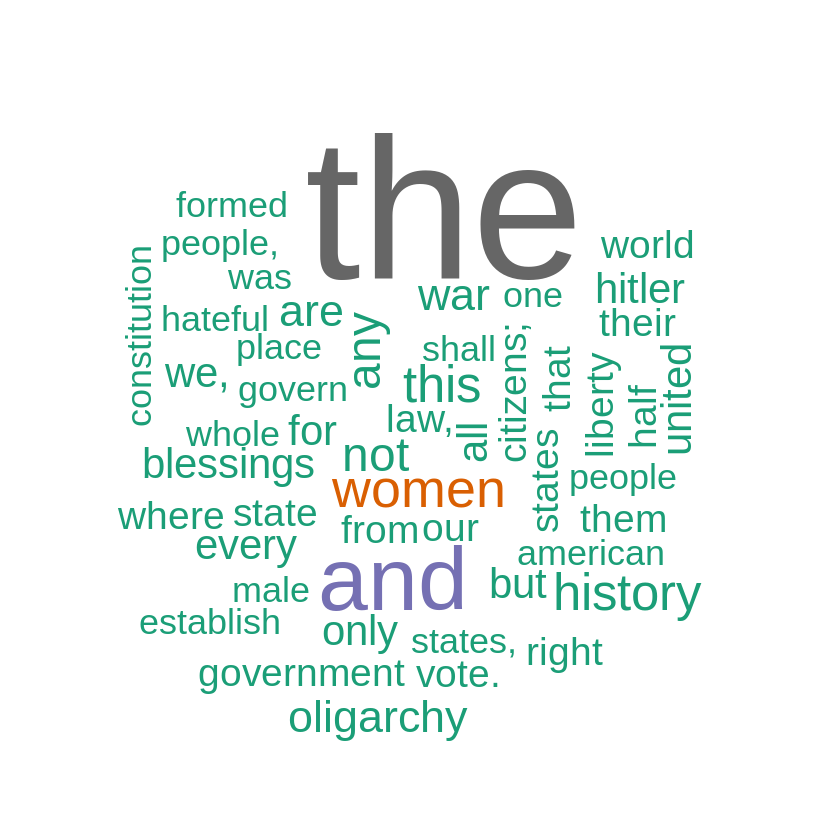

In [ ]:
# visualize frequencies using word cloud
wordcloud(names(wordCounts), wordCounts, 
          min.freq=2, max.words=50, rot.per=0.35, scale = c(10, 1.5),
          colors=brewer.pal(8, "Dark2"))

* Interesting results?
* What do you observe?
* How can we improve this plot to be more meaningful?

<br>

## Cleaning it up

Prior to our word cloud visualization, we can remove
* upper case
* punctuation
* any numbers (may not be interesting in this case)
* common words


<br>

We remove puncutation etc. using the `tm_map()` function

In [ ]:
# store before removal compare
before <- as.character(words.corpus[3]) 

# convert all to lower case
words.corpus <- tm_map(words.corpus, content_transformer(tolower))

# remove any punctuation
words.corpus <- tm_map(words.corpus, removePunctuation)

# remove numbers
words.corpus <- tm_map(words.corpus, removeNumbers)

# remove common english words
words.corpus <- tm_map(words.corpus, removeWords, stopwords("english"))
print(head(stopwords("english")))

Warning message in tm_map.SimpleCorpus(words.corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeWords, stopwords("english")):
“transformation drops documents”


[1] "i"      "me"     "my"     "myself" "we"     "our"   


In [ ]:
# before removal
before

[1] "Friends and fellow citizens: I stand before you tonight under indictment\n      for the alleged crime of having voted at the last presidential election,\n      without having a lawful\n      right to vote. It shall be my work this evening to prove to you that in\n      thus voting, I not only committed no crime, but, instead, simply exercised\n      my citizen's rights, guaranteed to me and all United States citizens by\n      the National Constitution, beyond the power of any state to deny. "
[2] "list(language = \"en\")"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
[3] "list()"

In [ ]:
# after removal
as.character(words.corpus[3])

[1] "friends  fellow citizens  stand   tonight  indictment\n        alleged crime   voted   last presidential election\n      without   lawful\n      right  vote  shall   work  evening  prove    \n      thus voting    committed  crime  instead simply exercised\n       citizens rights guaranteed     united states citizens \n       national constitution beyond  power   state  deny "
[2] "list(language = \"en\")"                                                                                                                                                                                                                                                                                                                                                                  
[3] "list()"

<br>

We can now create our word cloud

In [ ]:
# new term document matrix
tdm <- TermDocumentMatrix(words.corpus)

# Determine our most common words
m <- as.matrix(tdm)
wordCounts <- rowSums(m)
wordCounts <- sort(wordCounts, decreasing=TRUE)
print(head(wordCounts))

    women   history  citizens    states    people oligarchy 
        8         7         6         5         5         5 


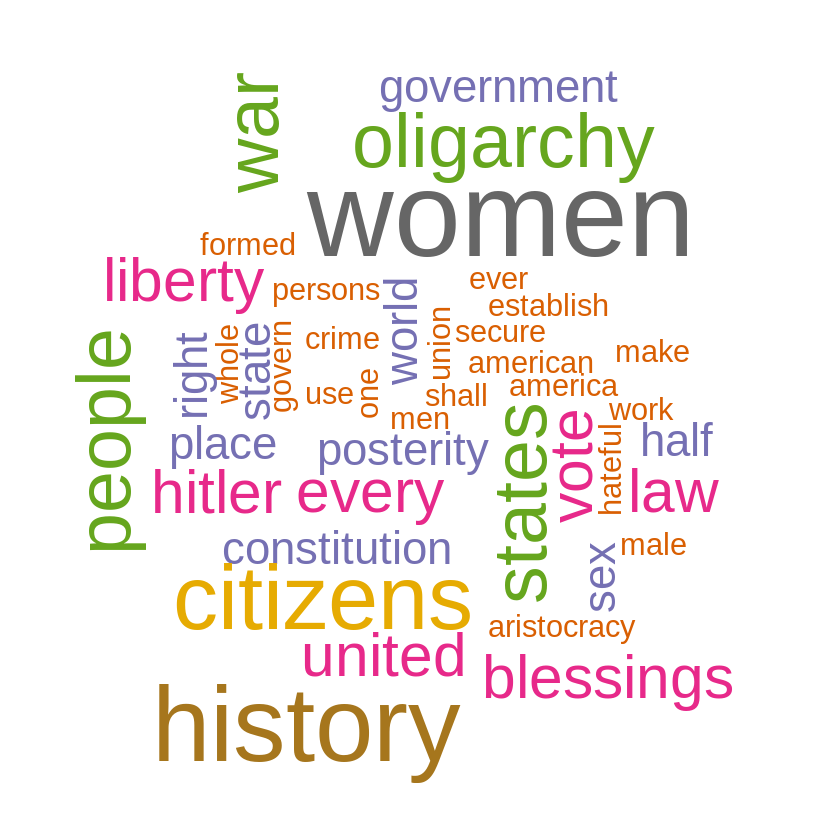

In [ ]:
# create word cloud
cloudFrame <- data.frame(word = names(wordCounts), freq=wordCounts)

wordcloud(names(wordCounts), wordCounts, 
          min.freq=2, max.words=50, rot.per=0.35, scale = c(6, 0.05),
          colors=brewer.pal(8, "Dark2"))

Which words still do not quite fit?

<br>

## Exercise

* Create a word cloud for a wikipedia article that interests you
* We will try to guess article theme during class

In [ ]:
# store the url
speech_url <- readLines("sample_html.html")
 
# Read and parse HTML file
speech = htmlTreeParse(speech_url, useInternal = TRUE)

# Extract all content from <p> tags 
speech_xpath <- xpathApply(speech, '//p', xmlValue)

# view as character vector
sba = unlist(speech_xpath)

# convert to vector source class
words.vec <- VectorSource(sba)

# create document corpus
words.corpus <- Corpus(words.vec)

# convert all to lower case
words.corpus <- tm_map(words.corpus, content_transformer(tolower))

# remove any punctuation
words.corpus <- tm_map(words.corpus, removePunctuation)

# remove numbers
words.corpus <- tm_map(words.corpus, removeNumbers)

# remove common english words
words.corpus <- tm_map(words.corpus, removeWords, c(stopwords("english"), "can", "also"))
# new term document matrix
tdm <- TermDocumentMatrix(words.corpus)

# Determine our most common words
m <- as.matrix(tdm)
wordCounts <- rowSums(m)
wordCounts <- sort(wordCounts, decreasing=TRUE)

# create word cloud
cloudFrame <- data.frame(word = names(wordCounts), freq=wordCounts)

wordcloud(names(wordCounts), wordCounts, 
          min.freq=2, max.words=50, rot.per=0.35, scale = c(10, 1),
          colors=brewer.pal(8, "Dark2"))

Warning message in file(con, "r"):
“cannot open file 'sample_html.html': No such file or directory”


ERROR: ignored